# Data Science For Design -  S1779199 Shuxian Liang

### The Structure Of My Jupyter Notebook
+ Introduction To Twitter Dataset
    - Basic Information of The Original Dataset
    - The Cleaning of The Dataset
    
    
+ Exploration On A Specific Subset
    - *__Overall Description__* Of The Cleaned Subset
    - Deep Exploration Of The *__Retweeted_status__* Dimension Of The Cleaned Subset


+ Reflect and Hypothesise



### The Directory Structure of Our Project
``` 
.
├── DS4D
│   ├── README.md
│   └── assignment2_common_cleaning.ipynb
├── assignment2_individual.ipynb
├── twitter
│   ├── 2016-06-21
│   │   └── 2016-06-21:08:34:01.json (The original subset)
│   ├── 2016-06-23
│   ├── 2017-09-22
│   └── 2017-09-23
└── cleaned_twitter
    ├── 2016-06-21
    │   └── c-2016-06-21-08-34-01.json (The cleaned example subset)
    ├── 2016-06-23
    ├── 2017-09-22
    └── 2017-09-23
```

### Github: [DS4D Link](https://github.com/LiquanChai/DS4D)


## &nbsp;
## Introduction To Twitter Dataset

### Basic Information Of The Original Dataset
#### The twitter dataset we have is about people attitudes to *__Brexit__*. The dataset is rather large and here is some basic information about our dataset.

- The dataset has more than 2.5 million data records totally and they are divided into 96 `(24*4)` subsets of various size.

- The twitter data is collected on 2016-06-21, 2016-06-23, 2017-09-22 and 2017-09-23, each with 24 subsets responding to its 24 hours.

- The original dataset (approx. 14 GB large totally) is provided as json format and it contains many useless fields (in fact, a majority of all fields are useless in our case) such as `majoriety` and `truncated` .




### The Cleaning Of The Dataset
#### According to the information mentioned above, we clean the dataset firstly and then extract all fields we need into a new/cleaned dataset. 

```
To run the following codes, we need to have a specific directory sturcture.
.
├── DS4D
│   ├── README.md
│   └── assignment2_common_cleaning.ipynb
├── assignment2_individual.ipynb
├── twitter
│   ├── 2016-06-21
│   │   └── 2016-06-21:08:34:01.json (The original subset)
│   ├── 2016-06-23
│   ├── 2017-09-22
│   └── 2017-09-23
└── cleaned_twitter
    ├── 2016-06-21
    │   └── c-2016-06-21-08-34-01.json (The cleaned example subset)
    ├── 2016-06-23
    ├── 2017-09-22
    └── 2017-09-23
```
**Important**: 
+ The cleaded subsets are stored in `cleaned_twitter` directory and they are grouped by their dates. They have been transformed into the format that can be directed parsed by `pandas.read_json` function.

+ `cleaned_twitter` directory and its child directories will not be created automatically by the following codes. They need to be created manually. Remember to check the project structure shown above.

+ Check the main area of the cell below. If you only want to clean all datasets (default), use ```paths = get_paths('twitter')```. If you want to clean the subset used in this notebook, use ```paths = ['2016-06-21/2016-06-21:08:34:01']```
 



In [1]:
# to make my python run faster, need to install cython
# %load_ext Cython 
import json
from os import listdir
from os.path import isfile, join
from functools import reduce

def get_paths(directory_path):
    '''
        This is used to get all orginal twitter json file paths automatically.
        
        Input: directory that stores twitter data
        Output: paths of all twitter json. e.g., 2016-06-21/2016-06-21:18:34:02
    '''
    paths = []
    for file_date in listdir(directory_path):
        if file_date[0]!='.':
            if file_date[0:1] =='2':
                for file_hour in listdir(join(directory_path,file_date)):
                    if file_hour[0]!='.':
                        file_hour = file_hour.split('.json')[0]  
                        paths.append(file_date+'/'+file_hour)
                    else:pass
            else:pass 
        else:pass 
    return paths
    
    
def parse_attr(datajson, attr):
    '''
        This is used to extract the fields we need from the original twitter data.
    
        input: level0-level1-level2, e.g., 'id', 'retweeted_status-created_at','retweeted_status-user-statuses_count'
        output: attr's list
        attention: attr-'entities-hashtags' has special structure
    '''
    attr_split = attr.split('-')
    
    
    if len(attr_split)==1:
        return datajson[attr_split[0]]
    
    
    elif len(attr_split)==2:   
        # deal with some special cases, e.g., entities-hashtags
        values = datajson[attr_split[0]][attr_split[1]]
        if(attr=='entities-hashtags'):
            hashtags = [hashtag['text'] for hashtag in values]
            if(len(hashtags)!=0):
                return reduce((lambda x,y: x+', '+y),hashtags )
            else:
                return ''
        else:    
            return values   
    
    
    elif len(attr_split)==3:
        return datajson[attr_split[0]][attr_split[1]][attr_split[2]]
    
    
    else:pass
    
    
# Main 
count = 0
paths = get_paths('twitter') # to clean all datasets, use this line of code.
# paths = ['2016-06-21/2016-06-21:08:34:01'] # to clean the subset used in this ipynb only, use this line of code.


for path in paths:
    with open('twitter/'+path+'.json', 'r+') as r:
        data = []
        # `columns` store the fields we want
        columns = ['id','text',
                   'entities-hashtags',
                   'created_at',
                   'retweeted_status-id',
                   'retweeted_status-created_at',
                   'retweeted_status-retweet_count',
                   'retweeted_status-favorite_count',
                   'retweeted_status-user-friends_count',
                   'retweeted_status-user-favourites_count',
                   'retweeted_status-user-id',
                   'retweeted_status-user-statuses_count',
                   'retweeted_status-user-followers_count',
                   'user-friends_count','user-favourites_count','user-statuses_count',
                   'user-geo_enabled','user-followers_count','user-location','user-id']
        
        for index, line in enumerate(r.readlines()):
            count = count + 1
            data.append([]) #i.e., create data[index] = []
            d = json.loads(line) 
            for attr in columns:
                try:
                    attr_value = parse_attr(d,attr)
                except KeyError:
                    attr_value = 'NULL' # When there is no retweeted
                data[index].append(attr_value)
                
                
        # build json that is used for pd.read_json function
        json_for_pd = dict()
        json_for_pd['columns'] = columns
        json_for_pd['index'] = [i for i in range(len(data))]
        json_for_pd['data'] = data

        # write json
        with open('cleaned_twitter/'+path[:11]+'c-'+path[11:].replace('/','-').replace(':','-')+'.json','w+') as w:
            w.write (json.dumps(json_for_pd))
        print('Finish: {}'.format(path))
        
print('Finish ALL, Total Record Numbers:',count)  

Finish: 2016-06-21/2016-06-21:18:34:02
Finish: 2016-06-21/2016-06-21:16:34:01
Finish: 2016-06-21/2016-06-21:21:34:01
Finish: 2016-06-21/2016-06-21:22:34:02
Finish: 2016-06-21/2016-06-21:07:34:01
Finish: 2016-06-21/2016-06-21:09:34:02
Finish: 2016-06-21/2016-06-21:13:34:01
Finish: 2016-06-21/2016-06-21:23:34:01
Finish: 2016-06-21/2016-06-21:14:34:01
Finish: 2016-06-21/2016-06-21:08:34:01
Finish: 2016-06-21/2016-06-21:19:34:01
Finish: 2016-06-21/2016-06-21:20:34:02
Finish: 2016-06-21/2016-06-21:05:34:01
Finish: 2016-06-21/2016-06-21:00:34:01
Finish: 2016-06-21/2016-06-21:11:34:01
Finish: 2016-06-21/2016-06-21:03:34:01
Finish: 2016-06-21/2016-06-21:12:34:01
Finish: 2016-06-21/2016-06-21:17:34:01
Finish: 2016-06-21/2016-06-21:06:34:01
Finish: 2016-06-21/2016-06-21:01:34:01
Finish: 2016-06-21/2016-06-21:10:34:01
Finish: 2016-06-21/2016-06-21:02:34:02
Finish: 2016-06-21/2016-06-21:15:34:01
Finish: 2016-06-21/2016-06-21:04:34:01
Finish: 2016-06-23/2016-06-23:10:34:01
Finish: 2016-06-23/2016-0

## &nbsp;
## Exploration On A Specific Subset

For the reason that the whole twitter dataset is sort of too large, I use one of the cleaned subset (i.e., `c-2016-06-21-08-34-01.json`) for my exploration.

### Overall Description Of The Cleaned Subset
Firstly, to load the subset making use of *__pandas.read_json__* function.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # to switch to seaborn defaults
example = 'c-2016-06-21-08-34-01' # 
df = pd.read_json('cleaned_twitter/2016-06-21/'+example+'.json', orient='split')

Then, get to know about the data.

In [3]:
original_shape = df.shape
print('-'*60+'\nShape of the data\n'+'-'*60)
print(original_shape)
print('-'*60+'\nExamples\n'+'-'*60)
df.head(5)

------------------------------------------------------------
Shape of the data
------------------------------------------------------------
(28839, 20)
------------------------------------------------------------
Examples
------------------------------------------------------------


,id,text,entities-hashtags,created_at,retweeted_status-id,retweeted_status-created_at,retweeted_status-retweet_count,retweeted_status-favorite_count,retweeted_status-user-friends_count,retweeted_status-user-favourites_count,retweeted_status-user-id,retweeted_status-user-statuses_count,retweeted_status-user-followers_count,user-friends_count,user-favourites_count,user-statuses_count,user-geo_enabled,user-followers_count,user-location,user-id
0,745157819561709568,"Views, Visions and Values.: Our last chance to...",,2016-06-21 07:34:03,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,370,2,7053,True,91,"Southport, Merseyside, UK",14151964
1,745157820421537792,RT @AdamBienkov: Half of Leave voters think #E...,EUref,2016-06-21 07:34:03,745155818799009792,Tue Jun 21 07:26:06 +0000 2016,33,11,2993,1638,14476016,40685,12715,1044,351,4295,False,631,South West,206675927
2,745157821017165824,"RT @WantEnglandBack: Oh dear, Cameron caught l...",,2016-06-21 07:34:03,745157731187752960,Tue Jun 21 07:33:42 +0000 2016,2,1,7209,10986,2228659594,38380,9711,2661,40130,38584,True,1943,"Aberdeen, Scotland",2218746357
3,745157820828418056,Turkey pricks tax 99 anarchists during Decembe...,Brexit,2016-06-21 07:34:03,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,652,31,6539,False,138,"England, United Kingdom",722423205584093186
4,745157821524652033,"David Beckham, underwear salesman (and former ...",EUref,2016-06-21 07:34:03,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,1497,788,2486,False,872,None,2737003958



>* It's a tabular.

>* It is a `28839 Rows (Tweets) * 20 Columns (Fields)` dataframe.


In [4]:
print('-'*60+'\nColumns Data Types\n'+'-'*60)
print(df.dtypes)
print('-'*60+'\nUnique Tweets (Total Tweets Numbers: {})\n'.format(original_shape[0])+'-'*60)
len_unique_tweet = len(np.unique(df['id']))
print(len_unique_tweet)

df = df.drop_duplicates() # replace the original df
assert len_unique_tweet == df.shape[0] # if True, `id` can be unique id.

------------------------------------------------------------
Columns Data Types
------------------------------------------------------------
id                                                 int64
text                                              object
entities-hashtags                                 object
created_at                                datetime64[ns]
retweeted_status-id                               object
retweeted_status-created_at                       object
retweeted_status-retweet_count                    object
retweeted_status-favorite_count                   object
retweeted_status-user-friends_count               object
retweeted_status-user-favourites_count            object
retweeted_status-user-id                          object
retweeted_status-user-statuses_count              object
retweeted_status-user-followers_count             object
user-friends_count                                 int64
user-favourites_count                              int64
user

>* There are mutiple data types of the fields. But the types of some fields are sort of strange (e.g., `retweeted_status-created_at` should be datatime but is object), which indicates that the subset may need further cleaning.

>* Through droping duplicates, it seems that `id` is the primary key/ unique ids. And `user-id`,`retweeted_status-id` and `retweeted_status-user-id` seems to be foreign keys.

In [5]:
time_uniques = len(np.unique(df['created_at']))
time_max = np.max(df['created_at'])
time_min = np.min(df['created_at'])
print('-'*60+'\nThe number of Unique Time Stamps\n'+'-'*60)
print(time_uniques)
print('-'*60+'\nTime Frame - Max Time\n'+'-'*60)
print(time_max)
print('-'*60+'\nTime Frame - Min Time\n'+'-'*60)
print(time_min)

------------------------------------------------------------
The number of Unique Time Stamps
------------------------------------------------------------
3597
------------------------------------------------------------
Time Frame - Max Time
------------------------------------------------------------
2016-06-21 08:34:01
------------------------------------------------------------
Time Frame - Min Time
------------------------------------------------------------
2016-06-21 07:34:03


> This file is `c-2016-06-21-08-34-01.json`, and the time format is `YYYY-MM-DD HH-MM-SS`. The number of unique time stamps and the time frame shown above are reasonable.  

In [6]:
len_unique_user = len(np.unique(df['user-id']))
assert len_unique_user!=df.shape[0]
print('-'*60+'\nUnique Users\n'+'-'*60)
print(len_unique_user)
print('-'*60+'\nSummary Statistics of Numeric Fields\n'+'-'*60)
df.describe()


------------------------------------------------------------
Unique Users
------------------------------------------------------------
15843
------------------------------------------------------------
Summary Statistics of Numeric Fields
------------------------------------------------------------


,id,user-friends_count,user-favourites_count,user-statuses_count,user-followers_count,user-id
count,2.883300e+04,28833.000000,28833.000000,2.883300e+04,2.883300e+04,2.883300e+04
mean,7.451653e+17,1278.040509,6441.190580,2.671609e+04,7.683934e+03,4.911387e+16
std,4.370190e+12,3418.662205,18652.672713,8.159456e+04,1.787091e+05,1.821952e+17
min,7.451578e+17,0.000000,0.000000,1.000000e+00,0.000000e+00,1.010300e+04
25%,7.451615e+17,210.000000,168.000000,1.958000e+03,1.680000e+02,1.345046e+08
50%,7.451653e+17,566.000000,1107.000000,7.563000e+03,5.290000e+02,5.063361e+08
75%,7.451691e+17,1381.000000,5128.000000,2.477000e+04,1.506000e+03,2.716397e+09
max,7.451729e+17,169801.000000,717556.000000,6.204126e+06,1.475740e+07,7.451602e+17


>* There are 28839 tweets but only 15843 unique users (tweets owner), which means that some user have more than 1 tweets. What'smore, `user-id` can be used as foreign keys, which allow repeated.
>* The fields/properties of users vary a lot from user to user.

**Attention**: The questions that the data owners has discussed with us are about: `What were people talking`, `Who was talking` and `What messages persisted`. They are mainly related to text analysis and user analysis. We will discuss these questions in furture work (Assignment3).

### Deep Exploration The *__Retweeted_status__* Dimension Of The Cleaned Subset



The *__Retweeted_status__* indicates whether the tweet (with the unique `id`) is a retweet. And if it's a retweet, the information about the original tweet is also included in *__Retweeted_status__*.

The *__Retweeted_status__* dimension should be important because people retweets the tweets they recognize and these retweeted tweets are usually more popular and wider disseminated than normal tweets.

**Important**:
* Not all data records in the subset are retweets, which means that we need to extract the retweets records firstly in the following steps. 
* With the help of the data cleaning conducted before, we set the values of *__Retweeted_status__*-related fields (e.g., retweeted_status-id) as 'NULL' for all the non-retweets records. 
* **tweets** means all data records in this subset.
* **retweets** means all data records with meaningful *__retweeted_status__* related fields (not 'NULL').
* **retweeted tweets**  means the origin of the retweets (`retweeted_status-id` are their unique ids). For covenience,
* **retweeted users** means the owner of the retweeted tweets.

Firstly, filtered from the *__df__*, to create a new DataFrame (named as *__retweet_df__*) to store all data records whose `retweeted_status-id` is not `'NULL'`. Then, show basic knowledges about *__retweet_df__*.

In [7]:
pd.options.mode.chained_assignment = None

# For the convenience of comparasion and computing, to changes the fields into correct data types.
retweet_df = df[df['retweeted_status-id']!='NULL'].copy(deep=True)
retweet_df['retweeted_status-created_at'] = pd.to_datetime(retweet_df['retweeted_status-created_at'])
retweet_df['retweeted_status-retweet_count'] = pd.to_numeric(retweet_df['retweeted_status-retweet_count'])
retweet_df['retweeted_status-favorite_count'] = pd.to_numeric(retweet_df['retweeted_status-favorite_count'])
retweet_df['retweeted_status-user-friends_count'] = pd.to_numeric(retweet_df['retweeted_status-user-friends_count'])
retweet_df['retweeted_status-user-favourites_count'] = pd.to_numeric(retweet_df['retweeted_status-user-favourites_count'])
retweet_df['retweeted_status-user-favourites_count'] = pd.to_numeric(retweet_df['retweeted_status-user-favourites_count'])
retweet_df['retweeted_status-user-id'] = pd.to_numeric(retweet_df['retweeted_status-user-id'])
retweet_df['retweeted_status-user-statuses_count'] = pd.to_numeric(retweet_df['retweeted_status-user-statuses_count'])
retweet_df['retweeted_status-user-followers_count'] = pd.to_numeric(retweet_df['retweeted_status-user-followers_count'])

print('-'*60+'\nThe shape of retweets records\n'+'-'*60)
print(retweet_df.shape)
print('-'*60+'\nRetweet Column Data Types\n'+'-'*60)
print(retweet_df.dtypes)
print('-'*60+'\nExamples\n'+'-'*60)
retweet_df.head(5)


------------------------------------------------------------
The shape of retweets records
------------------------------------------------------------
(17790, 20)
------------------------------------------------------------
Retweet Column Data Types
------------------------------------------------------------
id                                                 int64
text                                              object
entities-hashtags                                 object
created_at                                datetime64[ns]
retweeted_status-id                               object
retweeted_status-created_at               datetime64[ns]
retweeted_status-retweet_count                     int64
retweeted_status-favorite_count                    int64
retweeted_status-user-friends_count                int64
retweeted_status-user-favourites_count             int64
retweeted_status-user-id                           int64
retweeted_status-user-statuses_count               int64
retw

,id,text,entities-hashtags,created_at,retweeted_status-id,retweeted_status-created_at,retweeted_status-retweet_count,retweeted_status-favorite_count,retweeted_status-user-friends_count,retweeted_status-user-favourites_count,retweeted_status-user-id,retweeted_status-user-statuses_count,retweeted_status-user-followers_count,user-friends_count,user-favourites_count,user-statuses_count,user-geo_enabled,user-followers_count,user-location,user-id
1,745157820421537792,RT @AdamBienkov: Half of Leave voters think #E...,EUref,2016-06-21 07:34:03,745155818799009792,2016-06-21 07:26:06,33,11,2993,1638,14476016,40685,12715,1044,351,4295,False,631,South West,206675927
2,745157821017165824,"RT @WantEnglandBack: Oh dear, Cameron caught l...",,2016-06-21 07:34:03,745157731187752960,2016-06-21 07:33:42,2,1,7209,10986,2228659594,38380,9711,2661,40130,38584,True,1943,"Aberdeen, Scotland",2218746357
6,745157822933958661,RT @davenellist: #TUSC press statement from Mo...,"TUSC, EU",2016-06-21 07:34:04,745156908525330433,2016-06-21 07:30:25,2,0,8542,2860,29111590,17637,10345,939,4473,16675,True,794,None,3836464582
7,745157824053841921,RT @majorcowpie: The latest The Cowpie Daily! ...,"brexit, eng",2016-06-21 07:34:04,745156543004348419,2016-06-21 07:28:58,1,0,959,432,21487626,7014,376,908,854,15943,True,1339,"ÜT: 51.50345,-0.296785",183151795
9,745157824221585410,RT @hallsy68: With England not playing until n...,"brexit, EURO2016, EUref",2016-06-21 07:34:04,745154527532195840,2016-06-21 07:20:58,1,0,15,2,4204815219,9,7,724,22,4777,False,710,None,181147192




>There are 9 fields that are directly related to *__retweeted_status__* dimension. They are:
1. retweeted_status-id
1. retweeted_status-created_at
1. retweeted_status-retweet_count
1. retweeted_status-favorite_count
1. retweeted_status-user-friends_count
1. retweeted_status-user-favourites_count
1. retweeted_status-user-statuses_count
1. retweeted_status-user-followers_count
1. retweeted_status-user-id

&nbsp;
   <a id="graph1"></a>
Now, let's start to explore deeper the *__retweeted_status__* dimension. 
  *  What's the percentage of the *__retweets__* with respect to all tweets in this subset?


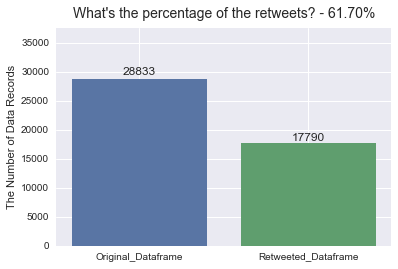

In [8]:
x = [1,2]
y = (df.shape[0],retweet_df.shape[0])


fig, ax = plt.subplots()
bar1, bar2 = plt.bar(x, y)

plt.xticks(x , ('Original_Dataframe','Retweeted_Dataframe'))
bar1.set_facecolor('#5975a4')
bar2.set_facecolor('#5f9e6e')
plt.ylabel('The Number of Data Records')
ax.set_ylim([0, y[0]*1.3]) # 

# Show value of bar
for x_,y_ in zip(x,y):
    plt.text(x_, y_*1.02, y_, horizontalalignment='center')
    
plt.title("What's the percentage of the retweets? - {:.2f}%".format(float(y[1]/y[0])*100), y=1.02, size=14)
plt.show()


 > According to the figure above, we can see that `61.72%` of the data records are retweets in this subset. By this way, we get to know that retweets do affect a lot during the dissemination of public attitudes to `Brexit` on Twitter.
 
&nbsp;
   <a id="graph2"></a>
* Questions about *__retweeted tweets__*:
  + How many unique retweeted tweets are there in the subset? 
  + What's the proporation of unique retweeted tweets with respect to all retweets in this subset? 
  + Which tweet was retweeted most in this case? Display `ids` of popular retweeted tweets.  


------------------------------------------------------------
The number of unique retweeted users
------------------------------------------------------------
5197
------------------------------------------------------------
The percentage of unique retweeted tweets with respect to all retweets (17790)
------------------------------------------------------------
29.21%
------------------------------------------------------------
Plot top 100 popular retweeted tweets
------------------------------------------------------------


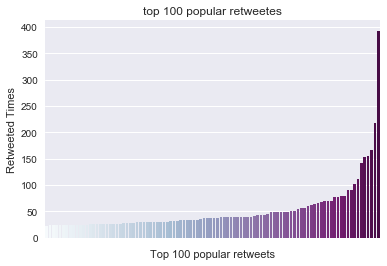

------------------------------------------------------------
Show top 10 popular retweets
------------------------------------------------------------
Retweet-Id     Retweeted Times
744975062021849088    393
745158969463758848    218
745159299857408009    166
745159370611134464    155
745161574810214400    154
745168064228950016    141
745160778928394240    111
745160624032751618    102
744936982552383490     91
745167092878479360     91
Name: retweeted_status-id, dtype: int64


In [9]:
unique_retweet_counts = retweet_df['retweeted_status-id'].value_counts()

print('-'*60+'\nThe number of unique retweeted users\n'+'-'*60)
print(len(unique_retweet_counts))

print('-'*60+'\nThe percentage of unique retweeted tweets with respect to all retweets ('+str(retweet_df.shape[0])+')\n'+'-'*60)
print('{:.2f}%'.format( len(unique_retweet_counts)/retweet_df.shape[0]*100))

print('-'*60+'\nPlot top 100 popular retweeted tweets\n'+'-'*60)
g = sns.barplot(x=unique_retweet_counts.index[:100], y=unique_retweet_counts[:100], palette="BuPu", order=np.flip(unique_retweet_counts.index[:100],0))
g.set_xticklabels('')
g.set_xlabel('Top 100 popular retweets')
g.set_ylabel('Retweeted Times')
plt.title('top 100 popular retweetes')
plt.show()

print('-'*60+'\nShow top 10 popular retweets\n'+'-'*60)
print('Retweet-Id     Retweeted Times\n{}'.format(unique_retweet_counts.head(10)))


> According to the information shown above, we can see that only 29.21% of the retweet tweets are unique, a relatively low proporation, which means that quite a lot retweets in the subset are originated from same tweets. To measure this, I rank the popularity of the retweeted tweets. Then I find that the most popular tweets have been retweeted for 393 times and there are 8 over-100-times-retweeted tweets. It seems that some (popular) tweets are well disseminated on Twitter, which finally affect a lot on public attitudes to Brexit on Twitter.

&nbsp;
 <a id="graph3"></a>
* How many unique retweeted users are there in the subset? Who was retweeted most? Display top 100 popular retweeted users.  

------------------------------------------------------------
The number of unique retweeted users
------------------------------------------------------------
3584
------------------------------------------------------------
Plot top 100 popular retweeted users
------------------------------------------------------------


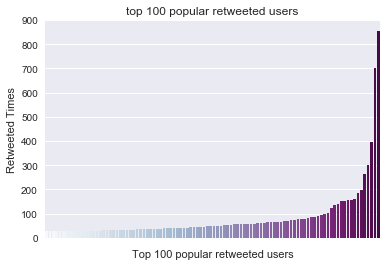

------------------------------------------------------------
Show top 10 popular retweeted users
------------------------------------------------------------
Retweeted-User-id  Retweeted Times
3695647695    856
3362016513    703
498753368     394
19346439      299
8170292       262
14291684      199
3135565264    183
459390022     161
1119758522    156
742143        156
Name: retweeted_status-user-id, dtype: int64


In [10]:
unique_user_counts = retweet_df['retweeted_status-user-id'].value_counts()

print('-'*60+'\nThe number of unique retweeted users\n'+'-'*60)
print(len(unique_user_counts))

print('-'*60+'\nPlot top 100 popular retweeted users\n'+'-'*60)
g = sns.barplot(x=unique_user_counts.index[:100], y=unique_user_counts[:100], palette="BuPu", order=np.flip(unique_user_counts.index[:100],0))

g.set_xticklabels('')
g.set_xlabel('Top 100 popular retweeted users')

g.set_ylabel('Retweeted Times')
plt.title('top 100 popular retweeted users')

plt.show()
print('-'*60+'\nShow top 10 popular retweeted users\n'+'-'*60)
print('Retweeted-User-id  Retweeted Times\n{}'.format(unique_user_counts.head(10)))


> There are 17790 retweets, 5197 unique retweeted tweets but only 3584 unique retweeted users. The most popular user in this subset has been retweeted for over 800 times and the second most popular user has been retweeted for over 700 times. It seems that some users can be regarded as opinion leader (of course they can also be the Newsmedia), who have great impact on public attitudes towards `Brexit` on Twitter.

>**Important**: The retweeted times shown above are counted from only this subset, which are totally different from the times recorded in fields `retweeted_status-retweet_count`.

&nbsp;
 <a id="graph4"></a>
* Fields `retweeted_status-retweet_count` and `retweeted_status-favorite_count` are both the features of the retweeted tweets. 
  + How are the their distributions like?

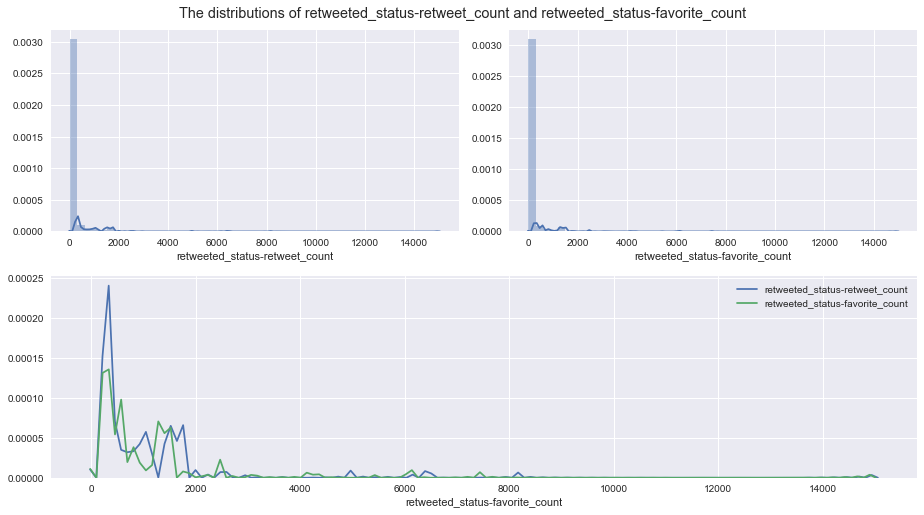

In [11]:
# Plot the distribution 
plt.subplots(2, 2, figsize=(13,7), sharex=True, sharey=True)
plt.subplot(2,2,1)
sns.distplot(retweet_df['retweeted_status-retweet_count'])
plt.subplot(2,2,2)
sns.distplot(retweet_df['retweeted_status-favorite_count'])

plt.subplot(2,2,(3,4))
sns.distplot(retweet_df['retweeted_status-retweet_count'], hist=False, kde_kws={"label": "retweeted_status-retweet_count"})
sns.distplot(retweet_df['retweeted_status-favorite_count'], hist=False, kde_kws={"label": "retweeted_status-favorite_count"})

plt.suptitle('The distributions of retweeted_status-retweet_count and retweeted_status-favorite_count', y=1.02)
plt.tight_layout()
plt.show()

 <a id="graph5"></a>
* * Is there any relationship (e.g., linear relationship) between them?

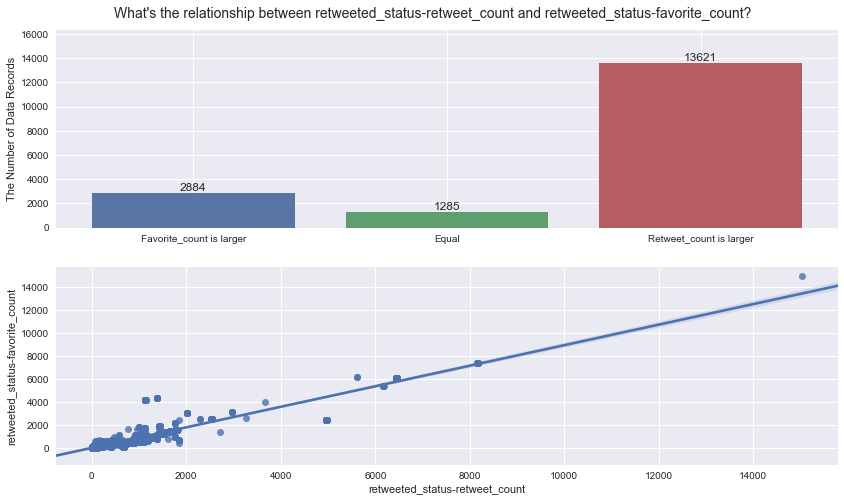

In [12]:
# compare the values and draw regression plot
count_favorite_larger = retweet_df[retweet_df['retweeted_status-retweet_count']<retweet_df['retweeted_status-favorite_count']].shape[0]
count_equal = retweet_df[retweet_df['retweeted_status-retweet_count']==retweet_df['retweeted_status-favorite_count']].shape[0]
count_retweet_larger = retweet_df[retweet_df['retweeted_status-retweet_count']>retweet_df['retweeted_status-favorite_count']].shape[0]
x = [1,2,3]
y = (count_favorite_larger, count_equal, count_retweet_larger)
fig, ax = plt.subplots(2, 1, figsize=(14,8), sharex=True, sharey=True)
fig.suptitle("What's the relationship between retweeted_status-retweet_count and retweeted_status-favorite_count? ", y=0.92, size=14)

ax1 = plt.subplot(2,1,1)
bar1, bar2, bar3 = plt.bar(x, y)
plt.xticks(x , ('Favorite_count is larger','Equal', 'Retweet_count is larger'))
bar1.set_facecolor('#5975a4')
bar2.set_facecolor('#5f9e6e')
bar3.set_facecolor('#b55d60')

plt.ylabel('The Number of Data Records')
ax1.set_ylim([0, np.max(y)*1.2]) # 
for x_,y_ in zip(x,y):
    ax1.text(x_, y_+200, y_, horizontalalignment='center')

ax2 = plt.subplot(2,1,2)
sns.regplot(data=retweet_df, x='retweeted_status-retweet_count', y='retweeted_status-favorite_count', ax=ax2)

plt.show()

>* According to two figures shown above, it seems that a majority of `retweeted_status-retweet_count` and `retweeted_status-favorite_count` fall into [0, 2000], while `retweeted_status-retweet_count` is usually larger than `retweeted_status-favorite_count`.
>* What's more, there seems to be a relatively strong linear relationship between `retweeted_status-retweet_count` and `retweeted_status-favorite_count`. That is, with the growth of `retweeted_status-retweet_count`, `retweeted_status-favorite_count` grows steadily.

&nbsp;
 <a id="graph6"></a>
* Fields `retweeted_status-user-friends_count`, `retweeted_status-user-favourites_count`, `retweeted_status-user-statuses_count` and `retweeted_status-user-followers_count` are all the features of `the retweeted tweets' owner`  (`retweeted users`).
  + How are the their distributions like?
  


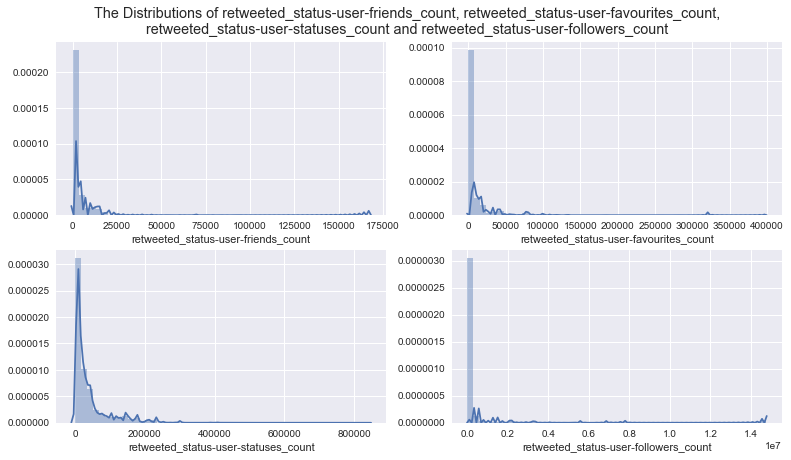

In [13]:
# Plot the distributions
fig, ax = plt.subplots(2, 2, figsize=(13,7), sharex=True, sharey=True)
plt.subplot(2,2,1)
sns.distplot(retweet_df['retweeted_status-user-friends_count'])
plt.subplot(2,2,2)
sns.distplot(retweet_df['retweeted_status-user-favourites_count'])
plt.subplot(2,2,3)
sns.distplot(retweet_df['retweeted_status-user-statuses_count'])
plt.subplot(2,2,4)
sns.distplot(retweet_df['retweeted_status-user-followers_count'])

plt.suptitle('The Distributions of retweeted_status-user-friends_count, retweeted_status-user-favourites_count,'+
             '\nretweeted_status-user-statuses_count and retweeted_status-user-followers_count', y=.95)
plt.show()

 <a id="graph7"></a>
* + What are the relationships between them?

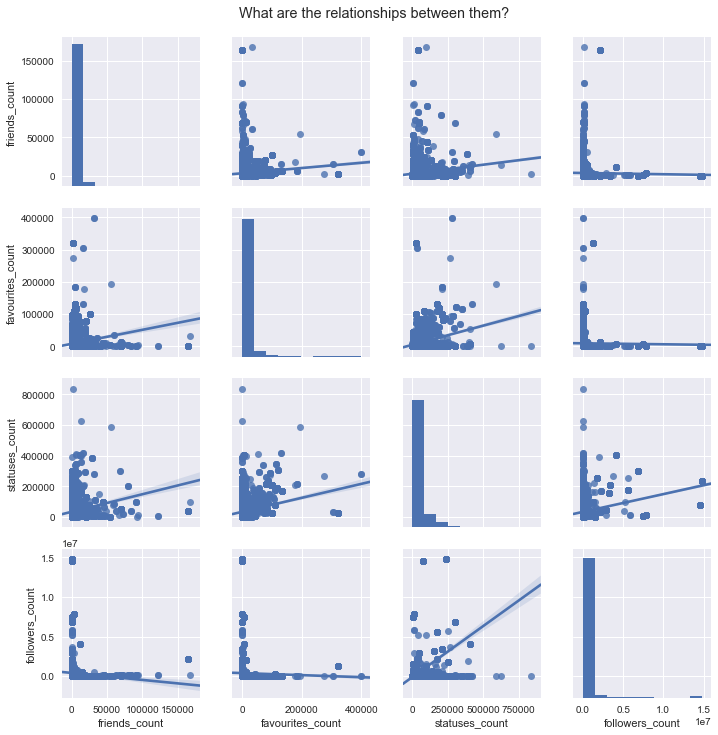

In [14]:
# Relationship
# To make the pairplot more readable, I rename these four fields (because the origianl field names are too long).
retweet_user_df = retweet_df[['retweeted_status-user-friends_count', 'retweeted_status-user-favourites_count',
                             'retweeted_status-user-statuses_count', 'retweeted_status-user-followers_count']].copy(deep=True)
retweet_user_df.columns = ['friends_count', 'favourites_count', 'statuses_count', 'followers_count']
sns.pairplot(data=retweet_user_df, kind="reg")
plt.suptitle('What are the relationships between them?', y=1.02)
plt.show()

> * The distributions of these 4 fields vary a lot. A majority of them fall on the left size of the distribution but show big difference in major distribution range.

> * There seems to be no strong linear relationship between these four fields.

&nbsp;
 <a id="graph8"></a>
* Finally, I want to explore the relationship between `created_at`, `retweeted_status-created_at`, `retweeted_status-retweet_count` and `retweeted_status-favorite_count`, specifically:
  + Hos is the distribution of existence time (`retweeted_status-created_at` - `created_at`) like?
  + How does `retweeted_status-retweet_count` change with the existence time
  + How does `retweeted_status-favorite_count` change with the existence time

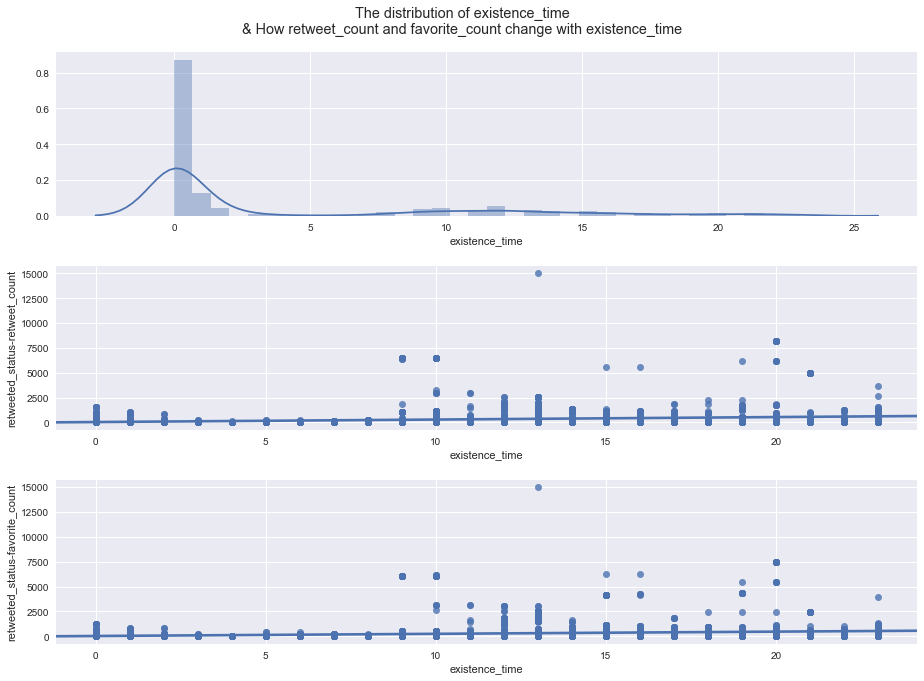

------------------------------------------------------------
Show existence_time frequency counts 
------------------------------------------------------------
0     10498
1      1527
12      667
2       541
10      538
9       440
13      428
11      415
15      359
14      304
8       260
16      253
21      222
17      203
20      171
23      162
22      149
19      144
18      144
3       139
7        73
4        67
6        48
5        38
Name: existence_time, dtype: int64


In [15]:
existence_time = []
index_created_at = retweet_df.columns.tolist().index('created_at')
index_retweeted_created_at = retweet_df.columns.tolist().index('retweeted_status-created_at')

for row in retweet_df.values:
    existence_time.append((row[index_created_at] - row[index_retweeted_created_at]).seconds//3600) #hours

# retweet_df with existence_time
retweet_df_with_ext = pd.concat([retweet_df.reset_index(), pd.Series(existence_time)],axis=1)
columns = retweet_df_with_ext.columns[:-1].tolist()
columns.append('existence_time')
retweet_df_with_ext.columns = columns



fig, ax = plt.subplots(3,1,figsize=(13,9), sharex=True, sharey=True)
plt.suptitle('The distribution of existence_time\n& How retweet_count and favorite_count change with existence_time', y=1.05)

ax1 = plt.subplot(3,1,1)
sns.distplot(retweet_df_with_ext['existence_time'], ax=ax1)

ax2 = plt.subplot(3,1,2)
sns.regplot(x='existence_time',y='retweeted_status-retweet_count',data=retweet_df_with_ext, ax=ax2)

ax3 = plt.subplot(3,1,3)
sns.regplot(x='existence_time',y='retweeted_status-favorite_count',data=retweet_df_with_ext, ax=ax3)


plt.tight_layout()
plt.show()

print('-'*60+'\nShow existence_time frequency counts \n'+'-'*60)
print(retweet_df_with_ext['existence_time'].value_counts().head(100))


> * From the perspective of retweeting bahavior, according to the figures and information shown above, I can see that most retweeting bahaviours happen within the first 2 hours of the creation of original tweets (retweeted tweets). Meanwhile, quite a lot retweeting bahaviours occur between 8-16 hours (especially 12 hours) after the creation.
> * From the perspective of popular retweeted tweets, I can see that most popular retweeted tweets become popular after 9 hours.
> * **Actually**, I think this part of data could be further explored. It's related to the propagation pattern of popular tweets about Brexit.

## &nbsp;
## Reflect and Hypothesise

### Reflection

* To be honest, the twitter data is quite large. It's sort of astonishing when I know the origial dataset is as large as 14GB. But considering about the data format (JSON) and the number of data records (2,617,555 data records), the size is quite reasonable and meanwhile the JSON format makes it easy for us to clean the data (**I love JSON!**). By the way, the size of the cleaned dataset is 960 MB.


* There are more than 100 fields available in the original dataset but not all of them are useful enough. It's rather difficult to choose which ones should be used for our exploration. After communicating with my group members, I decide to explore the *__retweeted_status__* dimension of the data. It's mainly related to the propagation patterns of Twitter. I have done some explorations in this ipython notebook and they are still too simple. I hope that I could explore more in the upcoming assignment3.


* The json format is pretty but the contents themselves are not pretty as well. Some graphs are not as good as my expectation (e.g., the distribution of existence_time). I think this is because the subset is not large enough to show the nature of the dataset. What's else, I do hope to learn more about how to visualize my unbalanced data in a pretty way.




### Hypothesis

* **Hypothesis 1**: There are some `opinion leaders` about Brexit on Twitter
  + According to [graph2](#graph2) and [graph3](#graph3), within this subset, there seems to be some retweeted tweets that have been retweeted for unpectedly many times and some retweeted users that have really high retweets counts. There may be opinion leaders about Brexit and they could be organizations (e.g.,newspedia) and individuals (e.g., scholars and officers).
  + I would like to test it by locating these important retweeted tweets and retweeted users in a larger dataset (e.g., all data records on '2016-06-21') and investigating the properties of some of them manually (e.g., to have a look at the detailed  webpages with the help of their unique ids).


* **Hypothesis 2**: There is a strong linear relationship between `retweeted_status-retweet_count` and `retweeted_status-favorite_count`
  + According to [graph5](#graph5), there seems to be a strong linear relationship between them.
  + I would like to use the linear regression model of `Scikit Learn` or `Seabron` and see how are the `r-value`, `coef` and `pvalue` attribute. 
  
  
* **Hypothesis 3**: There is a special propagation(retweeting) pattern about Brexit on Twitter
  + According to [graph8](#graph8), there seems to be a special pattern (see 8-16 hours) of the propagation of popular tweets about Brexit.
  + I want to test it by checking if this special phenomenon occurs in larger dataset (such as to systhesis one dataset that have more than 1 million data records, e.g., all data records on '2016-06-21'). And I want to find a better way to visualize the unbalanced data so as to better show the pattern.
  
 